In [ ]:
# usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# NLP -specific imports

# CountVectorizer => the most simple vectorizing tool for text data
from sklearn.feature_extraction.text import CountVectorizer

# import the multinomial Naive-Bayes (supports more than 2 outcomes too!)
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Advancing Machine Learning/exercise_2/data/news_category_clean.csv")

df.tail()

,category,authors,date,clean_headline,clean_description,year,month,headline_char_count,headline_word_count,avg_word_length
206636,TECH,"Reuters, Reuters",2012-01-28,rim ceo thorsten heins significant plans for b...,verizon wireless and att are already promoting...,2012,1,55,8,6.875000
206637,SPORTS,Unknown,2012-01-28,maria sharapova stunned by victoria azarenka i...,afterward azarenka more effusive with the pres...,2012,1,69,10,6.900000
206638,SPORTS,Unknown,2012-01-28,giants over patriots jets over colts among mos...,leading up to super bowl xlvi the most talked ...,2012,1,95,16,5.937500
206639,SPORTS,Unknown,2012-01-28,aldon smith arrested ers linebacker busted for...,correction an earlier version of this story in...,2012,1,50,8,6.250000
206640,SPORTS,Unknown,2012-01-28,dwight howard rips teammates after magic loss ...,the fivetime allstar center tore into his team...,2012,1,56,9,6.222222


In [ ]:
# small imbalance here going on
df['category'].value_counts()

,count
category,
POLITICS,35163
WELLNESS,17544
ENTERTAINMENT,17286
TRAVEL,9850
STYLE & BEAUTY,9272
PARENTING,8606
HEALTHY LIVING,6642
QUEER VOICES,6299
FOOD & DRINK,6299


In [ ]:
df['headline'] = df['clean_headline'] + " - " + df['clean_description']

In [ ]:
df = df[['category', 'headline']]

In [ ]:
df

,category,headline
0,U.S. NEWS,over million americans roll up sleeves for omi...
1,U.S. NEWS,american airlines flyer charged banned for lif...
2,COMEDY,of the funniest tweets about cats and dogs thi...
3,PARENTING,the funniest tweets from parents this week sep...
4,U.S. NEWS,woman who called cops on black birdwatcher los...
...,...,...
206636,TECH,rim ceo thorsten heins significant plans for b...
206637,SPORTS,maria sharapova stunned by victoria azarenka i...
206638,SPORTS,giants over patriots jets over colts among mos...
206639,SPORTS,aldon smith arrested ers linebacker busted for...


In [ ]:
labels = ['HEALTHY LIVING', 'COMEDY', 'FOOD & DRINK', 'BUSINESS']


In [ ]:
categories_to_filter = labels

# Filter rows where category is in the list
df = df[df['category'].isin(categories_to_filter)]

In [ ]:
df['category'].value_counts()

,count
category,
HEALTHY LIVING,6642
FOOD & DRINK,6299
BUSINESS,5956
COMEDY,5278


In [ ]:
num_samples_to_select = 5250

if len(df) > num_samples_to_select:
    df = df.sample(n=num_samples_to_select, random_state=42).reset_index(drop=True)
    print(f"Dataset reduced to {num_samples_to_select} samples.")
else:
    print(f"Dataset has {len(df)} samples, which is less than or equal to the requested {num_samples_to_select}. Using all available samples.")

df.tail()

Dataset reduced to 5250 samples.


,category,headline
5245,FOOD & DRINK,terrible pasta toppings we have to banish from...
5246,FOOD & DRINK,recipes to perfect your brunch skills - with e...
5247,BUSINESS,cdw and charles barkley an advertising dream t...
5248,FOOD & DRINK,great food pornphotographer of the month recla...
5249,COMEDY,stephen colbert reviews america again by steph...


In [ ]:
!pip install nltk
!pip install stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download once (will skip if already installed)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource

# Load stopwords ONCE (important for speed)
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # safety check for NaN values
        words = word_tokenize(text)  # proper tokenization
        filtered_words = [w for w in words if w.lower() not in stop_words]
        return " ".join(filtered_words)
    return ""

# Apply to your review column
df['headline_clean'] = df['headline'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the English version explicitly
nltk.download('wordnet') # Download wordnet

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized = [
        lemmatizer.lemmatize(w, get_wordnet_pos(w))
        for w in words
    ]
    return " ".join(lemmatized)

df['headline_lemma'] = df['headline_clean'].apply(lemmatize_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.tail()

,category,headline,headline_clean,headline_lemma
5245,FOOD & DRINK,terrible pasta toppings we have to banish from...,terrible pasta toppings banish hearts photos -...,terrible pasta topping banish heart photo - pl...
5246,FOOD & DRINK,recipes to perfect your brunch skills - with e...,recipes perfect brunch skills - easter mothers...,recipe perfect brunch skill - easter mother da...
5247,BUSINESS,cdw and charles barkley an advertising dream t...,cdw charles barkley advertising dream team - n...,cdw charles barkley advertising dream team - n...
5248,FOOD & DRINK,great food pornphotographer of the month recla...,great food pornphotographer month reclaming pr...,great food pornphotographer month reclaming pr...
5249,COMEDY,stephen colbert reviews america again by steph...,stephen colbert reviews america stephen colber...,stephen colbert review america stephen colbert...


In [ ]:

df.drop(columns=['headline', 'headline_clean'], inplace=True)

In [ ]:
df

,category,headline_lemma
0,BUSINESS,poorest country world wall st - accord data re...
1,FOOD & DRINK,recipe day filet mignon - topped carawaycilant...
2,HEALTHY LIVING,
3,COMEDY,mitt romney defends fema stance final plea snl...
4,FOOD & DRINK,alltime best chocolate recipe photo - warn mak...
...,...,...
5245,FOOD & DRINK,terrible pasta topping banish heart photo - pl...
5246,FOOD & DRINK,recipe perfect brunch skill - easter mother da...
5247,BUSINESS,cdw charles barkley advertising dream team - n...
5248,FOOD & DRINK,great food pornphotographer month reclaming pr...


In [ ]:
 # since Naive-Bayes is very simple and doesn't care about context and semantic
# structure, we can skip tokenization for simple Naive-Bayes models usually
vectorizer = CountVectorizer()

# create X/y -split
X = vectorizer.fit_transform(df['headline_lemma'])
y = df['category'].values

In [ ]:
# train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
 # create model and train it
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
import numpy as np
import pandas as pd # Import pandas to use pd.isna()

print(f"Does y contain NaN values? {pd.isna(y).any()}")
print(f"Length of y: {len(y)}")

Does y contain NaN values? False
Length of y: 5250


In [ ]:
 # test predictions for metrics later
predictions = model.predict(X_test)

In [ ]:
 # accuracies etc.
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

      BUSINESS       0.86      0.67      0.75       258
        COMEDY       0.91      0.68      0.78       252
  FOOD & DRINK       0.86      0.94      0.90       259
HEALTHY LIVING       0.66      0.88      0.75       281

      accuracy                           0.80      1050
     macro avg       0.82      0.79      0.80      1050
  weighted avg       0.82      0.80      0.79      1050



<Axes: >

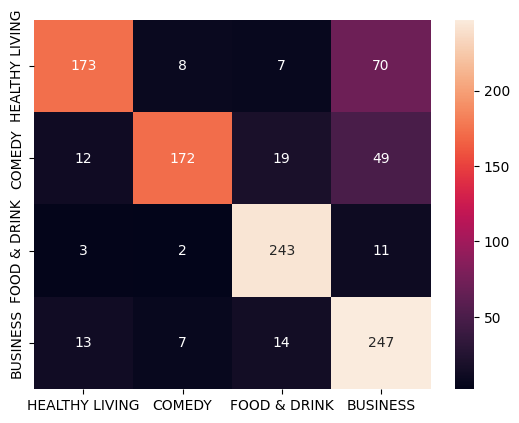

In [ ]:
 # create confusion matrix and show it
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g",
            xticklabels=labels, yticklabels=labels)

In [ ]:
# switch to decimal format
np.set_printoptions(precision=8, suppress=True)

In [ ]:
# you can have multiple messages here!
sample_messages = [
    "Local restaurant chain reports record profits after expanding to new cities",   # Business
    "New plant-based burger becomes a favorite among food lovers",                   # Food & Drink
    "Pride parade draws thousands in celebration of LGBTQ+ community",               # Queer Voice
    "Celebrity chef shares easy homemade pasta recipe on social media"               # Food & Drink
]

# vectorize the new messages and predict the values
processed_text = vectorizer.transform(sample_messages)
results = model.predict_proba(processed_text)

In [ ]:
print("Results for the Naive-Bayes and news article headline classification!")

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):

    row = results[index]
    result = np.argmax(row)
    result_text = labels[result]

    print()
    print(sample_messages[index])
    print(row.astype(float))
    print(result_text)
    print()

Results for the Naive-Bayes and news article headline classification!

Local restaurant chain reports record profits after expanding to new cities
[0.09890342 0.00122729 0.89302577 0.00684353]
FOOD & DRINK


New plant-based burger becomes a favorite among food lovers
[0.00293044 0.00073154 0.97369895 0.02263907]
FOOD & DRINK


Pride parade draws thousands in celebration of LGBTQ+ community
[0.21331819 0.30676008 0.102541   0.37738073]
BUSINESS


Celebrity chef shares easy homemade pasta recipe on social media
[0.00000008 0.00000002 0.99999863 0.00000127]
FOOD & DRINK

